In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from PIL import Image
import cv2
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.ndimage import convolve
from matplotlib import colors
from scipy import interpolate
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import CubicSpline
from scipy.interpolate import BSpline
from scipy.interpolate import make_interp_spline
from scipy.interpolate import make_lsq_spline

In [2]:
plt.style.use?

,AL-B,AL-A,SiO2-A,SiO2-B,SiO2-C,SiC-A,SiC-B
0,0.024409,0.025955,0.038546,0.038920,0.038328,0.023676,0.025191
1,0.023303,0.017089,0.034297,0.036556,0.040817,0.018755,0.019722
2,0.022241,0.019472,0.033443,0.035615,0.036861,0.020172,0.022646
3,0.010967,0.019893,0.023672,0.024690,0.013725,NaN,0.016358
4,0.007294,0.005548,0.015491,0.018679,0.016648,0.009890,0.009625
5,0.004063,0.001216,0.011778,0.011969,0.011877,0.005900,0.007038
6,0.003664,0.000893,0.011377,0.013429,0.014368,0.008264,0.007620
7,0.002845,0.006359,0.017804,0.022319,0.022124,0.010964,0.009269
8,0.009184,0.014818,0.028802,0.031143,0.031765,0.017248,0.012336
9,0.016421,0.029351,0.041875,0.042990,0.043612,0.025463,0.018884


,AL-B,AL-A,SiO2-A,SiO2-B,SiO2-C,SiC-A,SiC-B
0,0.026026,0.026024,0.039393,0.041156,0.036619,0.017428,0.017267
1,0.023540,0.019099,0.042599,0.041751,0.039180,0.013338,0.014006
2,0.021411,0.018976,0.037397,0.039959,0.035962,0.015149,0.016452
3,0.011414,0.026453,0.030319,0.026759,0.010087,NaN,0.010526
4,0.007221,0.003803,0.019370,0.020014,0.019128,0.004043,0.005953
5,0.001860,0.000529,0.012231,0.014099,0.012905,0.002206,0.003402
6,0.001327,0.001209,0.016373,0.015634,0.015991,0.003553,0.002493
7,0.002636,0.006503,0.023150,0.023547,0.023526,0.006649,0.004033
8,0.009435,0.016868,0.033388,0.034677,0.034952,0.013738,0.008329
9,0.017243,0.028998,0.048271,0.047090,0.044064,0.020965,0.013761


,AL-B,AL-A,SiO2-A,SiO2-B,SiO2-C,SiC-A,SiC-B
0,0.012105,0.012277,0.012181,0.010130,0.009707,0.006101,0.005248
1,0.008429,0.007097,0.007808,0.008126,0.006626,0.002918,0.003871
2,0.003553,0.002405,0.003323,0.003386,0.003337,0.001440,0.001676
3,0.001136,0.000542,0.000942,0.000820,0.000164,NaN,0.000892
4,0.006343,0.009497,0.009743,0.010107,0.008797,0.005746,0.003246
5,0.014855,0.014769,0.016338,0.012546,0.012246,0.005561,0.007523
6,0.016576,0.017014,0.018857,0.016562,0.016589,0.011012,0.008824
7,0.017936,0.013270,0.013816,0.012666,0.012045,0.006493,0.010079
8,0.010767,0.005575,0.005456,0.004175,0.005205,0.003040,0.004774
9,0.001739,0.001985,0.002119,0.001762,0.001373,0.001321,0.001104


,AL-B,AL-A,SiO2-A,SiO2-B,SiO2-C,SiC-A,SiC-B
0,0.006472,0.006539,0.006199,0.005009,0.004061,0.002271,0.002585
1,0.002895,0.001998,0.001789,0.001946,0.002037,0.000957,0.000653
2,0.000947,0.000968,0.000743,0.000339,0.000751,0.000211,0.000304
3,0.004415,0.003712,0.003385,0.003423,0.000664,NaN,0.002542
4,0.007936,0.006922,0.006508,0.006624,0.005112,0.003065,0.003198
5,0.002633,0.001405,0.001502,0.001481,0.001407,0.000712,0.000843
6,0.000276,0.000894,0.000918,0.001001,0.000686,0.001513,-0.000088
7,0.002040,0.007244,0.006531,0.006346,0.006884,0.003545,0.001791
8,0.009242,0.011390,0.011988,0.010767,0.011459,0.004147,0.003273
9,0.008201,0.007034,0.005872,0.006399,0.005046,0.001806,0.002726


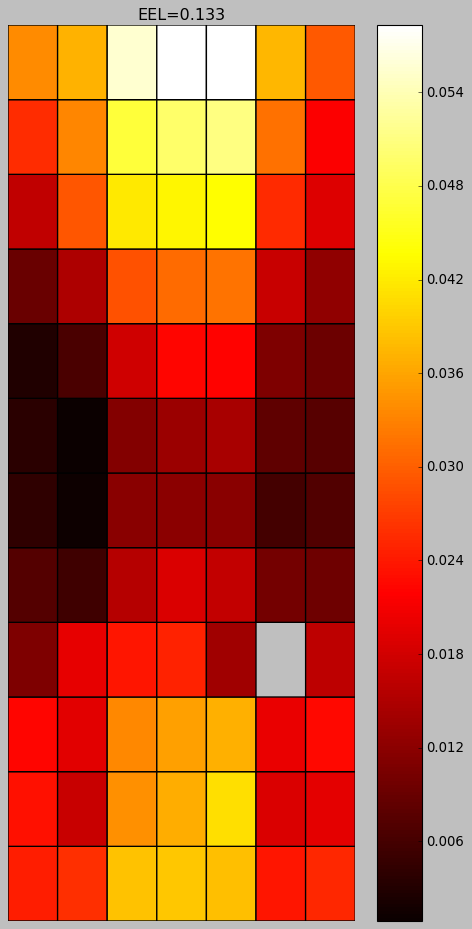

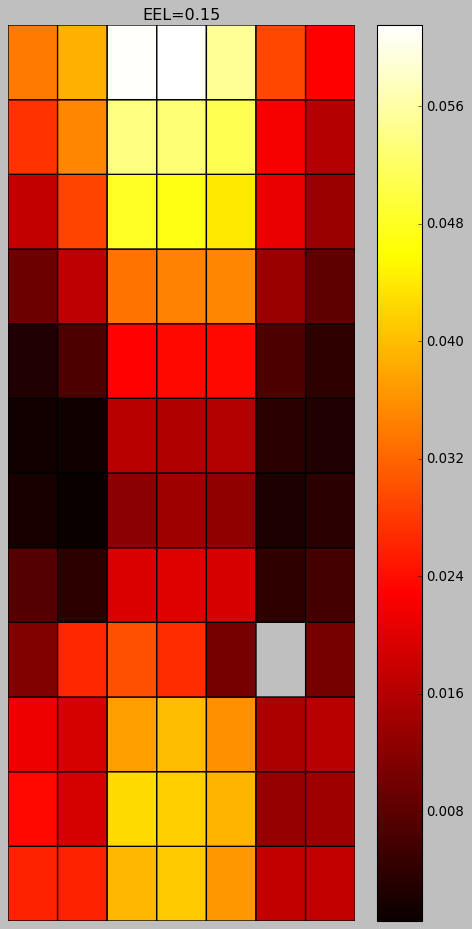

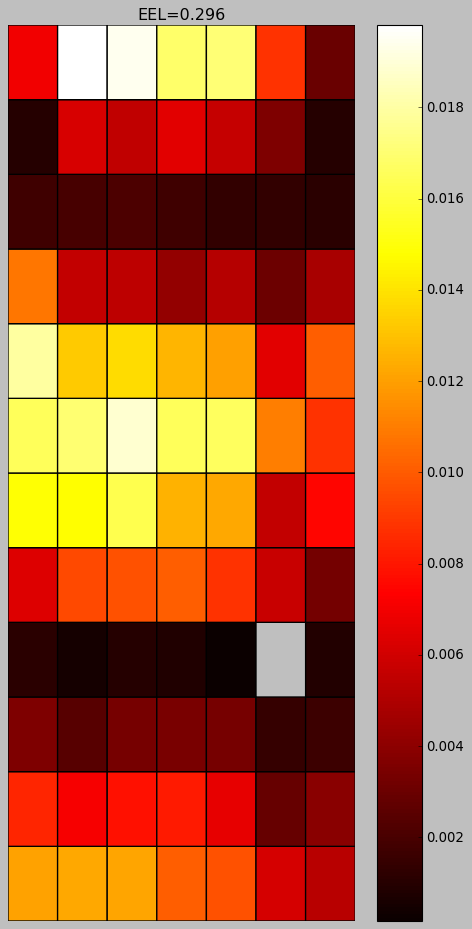

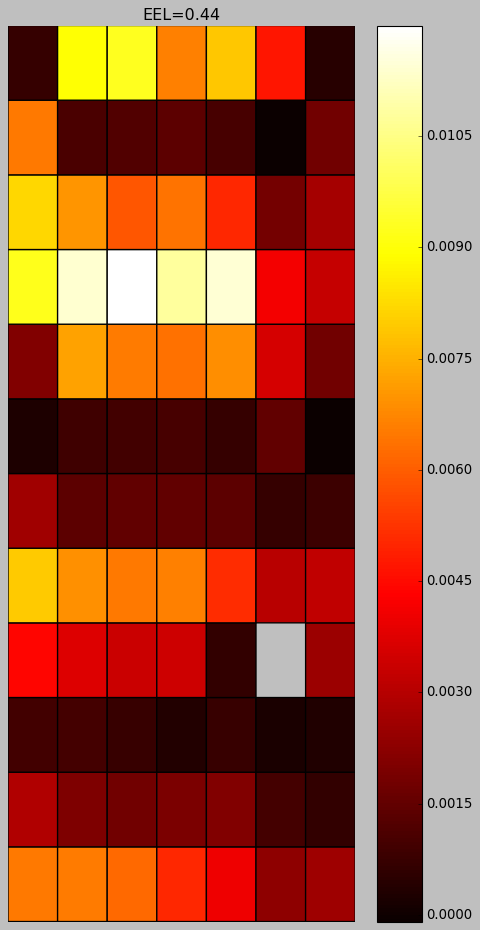

In [10]:
error=0.0006
lower=400
upper=950
Num=300
num=300
tt='reflect'
plt.style.use('classic')
val=1
typ='gaussian'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
alanum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
number=['0000','0250','0500']
label=['A','B','C']
total=[alanum,albnum,numbers,numbers,numbers,sianum,sibnum]
for i in range(1000,3001,250):
    number.append(str(i))
'''number.append('3050')
number.append('3100')'''
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
z=0
xzs=[0.133,0.15,0.296,0.44]
total={}
for x in xzs:
    for k in ['AL-B','AL-A','AL-C','SiO2-A','SiO2-B','SiO2-C','SiC-A','SiC-B','SiC-C']:
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                z+=1
                #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                try:
                    df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    for column in df.index:
                            if column>-error+x and column<x+error:
                                y=df.loc[column].values[0]
                                ys.append(y)
                                break
                    #print('Picture saved')
                except Exception as e:
                    ys.append(np.nan)
                    pass
            total['{}'.format(k)]=ys
    fig= plt.figure(figsize=(7,14))
    axes=fig.add_subplot(1,1,1)
    df2=DataFrame(total)
    df2.drop(['AL-C','SiC-C'],axis=1,inplace=True)
    #df1.to_csv('EEl={}.csv'.format(x))
    #f1=df2.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
    df1=df2
    xx=np.linspace(0,7,7)
    yy=numbers
    #img=plt.contourf(xx,yy,df1.values,cmap='hot')
    plt.pcolor(df1.values, edgecolors='k', linewidths=1.2,cmap='hot')
    plt.colorbar()
    '''norm = colors.Normalize(vmin=-0.001, vmax=0.07)
    img.set_norm(norm)'''
    plt.axis('off')
    #plt.imshow(df1.values,cmap='hot')
    '''for Nu in range(0,7):
        plt.axvline(x=Nu, ymin=0, ymax=1,linewidth=3, color='white')'''
        
    plt.title('EEL={}'.format(x))
    #display(df1)
    plt.savefig('250PclEEL={}.png'.format(x),bbox_inches='tight')
    display(df2)

In [14]:
k=[]
l=[]
for i in range (1,df1.shape[0]+1):
    z=df1.iloc[i-1:i].values[0]
    k.append(max(z))
    l.append(min(z))
display(max(k),min(l))

0.057303994549743026

0.001509597431562684

In [4]:
df1

,AL-B,AL-A,SiO2-A,SiO2-B,SiO2-C,SiC-A,SiC-B
0,0.012105,0.012277,0.012181,0.010130,0.009707,0.006101,0.005248
1,0.010267,0.009057,0.010908,0.009704,0.008155,0.004636,0.004560
2,0.008429,0.007097,0.007808,0.008126,0.006626,0.002918,0.003871
3,0.003553,0.002405,0.003323,0.003386,0.003337,0.001440,0.001676
4,0.001136,0.000542,0.000942,0.000820,0.000164,0.003593,0.000892
5,0.006343,0.009497,0.009743,0.010107,0.008797,0.005746,0.003246
6,0.014855,0.014769,0.016338,0.012546,0.012246,0.005561,0.007523
7,0.016576,0.017014,0.018857,0.016562,0.016589,0.011012,0.008824
8,0.017936,0.013270,0.013816,0.012666,0.012045,0.006493,0.010079
9,0.010767,0.005575,0.005456,0.004175,0.005205,0.003040,0.004774


In [5]:
for i in range (1,df1.shape[0]+1):
    z=df1.iloc[i-1:i].values
    display(z)

array([[0.01210549, 0.01227747, 0.01218099, 0.01012966, 0.00970749,
        0.00610147, 0.00524781]])

array([[0.01026714, 0.00905674, 0.01090789, 0.00970367, 0.00815548,
        0.00463628, 0.00455961]])

array([[0.00842879, 0.00709711, 0.00780751, 0.00812626, 0.00662613,
        0.00291798, 0.0038714 ]])

array([[0.00355326, 0.00240547, 0.00332272, 0.00338648, 0.00333681,
        0.00143984, 0.00167606]])

array([[0.00113551, 0.00054161, 0.00094151, 0.00081959, 0.00016362,
        0.00359269, 0.00089235]])

array([[0.0063433 , 0.00949707, 0.0097435 , 0.01010701, 0.00879708,
        0.00574553, 0.00324611]])

array([[0.01485513, 0.01476871, 0.01633766, 0.01254622, 0.01224554,
        0.00556112, 0.0075227 ]])

array([[0.0165757 , 0.01701418, 0.01885721, 0.01656201, 0.01658852,
        0.01101192, 0.00882359]])

array([[0.01793571, 0.01327044, 0.01381592, 0.01266638, 0.01204482,
        0.00649261, 0.01007898]])

array([[0.01076663, 0.00557514, 0.00545593, 0.00417486, 0.0052053 ,
        0.00304049, 0.004774  ]])

array([[0.001739  , 0.00198457, 0.00211856, 0.00176166, 0.00137322,
        0.00132079, 0.00110355]])

array([[0.00100568, 0.00619122, 0.00553005, 0.00652001, 0.00564764,
        0.00357106, 0.00094914]])

array([[0.00693512, 0.01980449, 0.01946223, 0.01686596, 0.01705608,
        0.00877017, 0.00293046]])

array([[0.01614707, 0.01662524, 0.0169896 , 0.01532605, 0.01487983,
        0.00916174, 0.00843567]])

array([[0.01472982, 0.01344598, 0.01451696, 0.01378614, 0.01270358,
        0.00955331, 0.00716672]])

In [1]:
df2=df1.interpolate(method='spline',order=5, limit_direction='forward', axis=0).transpose()
plt.axis('off')
plt.imshow(df2.values,cmap='hot')
plt.title('EEL={}_{}'.format(xzs[0],'Linear'))
plt.savefig('Linear.png',bbox_inches='tight')

NameError: name 'df1' is not defined

In [5]:
df1

,AL-B,AL-A,SiO2-A,SiO2-B,SiO2-C,SiC-A,SiC-B
0,0.024409,0.025955,0.038546,0.038920,0.038328,0.023676,0.025191
100,NaN,0.018861,0.037080,0.037818,0.037162,0.017380,NaN
250,0.023303,0.017089,0.034297,0.036556,0.040817,0.018755,0.019722
500,0.022241,0.019472,0.033443,0.035615,0.036861,0.020172,0.022646
1000,0.010967,0.019893,0.023672,0.024690,0.013725,NaN,0.016358
1250,0.007294,0.005548,0.015491,0.018679,0.016648,0.009890,0.009625
1500,0.004063,0.001216,0.011778,0.011969,0.011877,0.005900,0.007038
1750,0.003664,0.000893,0.011377,0.013429,0.014368,0.008264,0.007620
2000,0.002845,0.006359,0.017804,0.022319,0.022124,0.010964,0.009269
2250,0.009184,0.014818,0.028802,0.031143,0.031765,0.017248,0.012336


TypeError: Length of x must be number of columns in z.

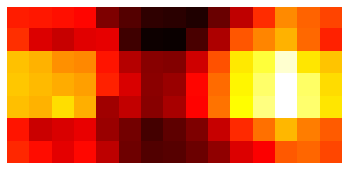

In [15]:
df1['SiC-A'][3050]=sum([df1['SiC-A'][3000],df1['SiC-A'][3100],df1['SiC-B'][3050]])/3
df1['AL-A'][3050]=sum([df1['AL-A'][3000],df1['AL-A'][3100],df1['AL-B'][3050]])/3
df1['SiO2-A'][3050]=sum([df1['AL-A'][3050],df1['SiO2-A'][3000],df1['SiO2-A'][3100]])/3
#display(df1)
df2=df1.interpolate(method='from_derivatives', limit_direction='forward', axis=0).transpose()
#display(df2)
plt.axis('off')
plt.imshow(df2.values,cmap='hot')
yy=df2.index
xx=np.linspace(0,7,7)
plt.contourf(xx,yy,df2.values,cmap='jet')
plt.title('EEL={}_{}'.format(xzs[0],'Surround'))
plt.savefig('Surround.png',bbox_inches='tight')

In [18]:
'''* 'linear': Ignore the index and treat the values as equally
      spaced. This is the only method supported on MultiIndexes.
    * 'time': Works on daily and higher resolution data to interpolate
      given length of interval.
    * 'index', 'values': use the actual numerical values of the index.
    * 'pad': Fill in NaNs using existing values.
    * 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline',
      'barycentric', 'polynomial': Passed to
      `scipy.interpolate.interp1d`. These methods use the numerical
      values of the index.  Both 'polynomial' and 'spline' require that
      you also specify an `order` (int), e.g.
      ``df.interpolate(method='polynomial', order=5)``.
    * 'krogh', 'piecewise_polynomial', 'spline', 'pchip', 'akima':
      Wrappers around the SciPy interpolation methods of similar
      names. See `Notes`.
    * 'from_derivatives': Refers to
      `scipy.interpolate.BPoly.from_derivatives` which
      replaces 'piecewise_polynomial' interpolation method in
      scipy 0.18.'''

In [13]:
df2.columns

Int64Index([   0,  100,  250,  500, 1000, 1250, 1500, 1750, 2000, 2250, 2500,
            2750, 3000, 3050, 3100],
           dtype='int64')

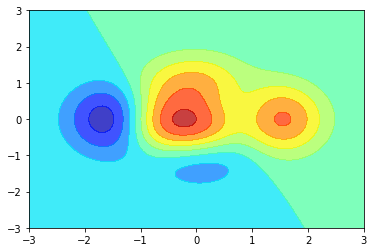

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, y): 
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)
n = 256 
x = np.linspace(-3, 3, n) 
y = np.linspace(-3, 3, n) 
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='jet') 

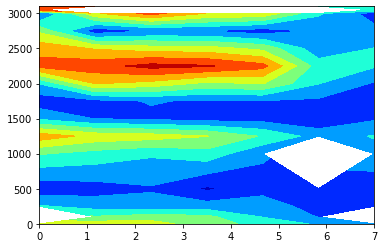

In [14]:
x=np.linspace(0,7,7)
y=df1.index
plt.contourf(x,y,df1.values,cmap='jet')

In [15]:
df1

,AL-B,AL-A,SiO2-A,SiO2-B,SiO2-C,SiC-A,SiC-B
0,0.006964,0.006851,0.006668,0.005095,0.004011,0.002779,0.002201
100,NaN,0.004632,0.005217,0.004858,0.002929,0.001431,NaN
250,0.003176,0.002358,0.002096,0.002185,0.002163,0.000954,0.001083
500,0.000459,0.000857,0.001340,-0.000252,0.001052,0.000345,0.000436
1000,0.004633,0.003926,0.003214,0.003921,0.001673,NaN,0.002563
1250,0.008392,0.006998,0.006705,0.006049,0.004356,0.002343,0.003089
1500,0.002731,0.001455,0.001193,0.000847,0.000867,0.000370,0.001289
1750,0.000581,0.001060,0.001605,0.001310,0.001412,0.001225,0.000309
2000,0.003079,0.007582,0.006985,0.005625,0.006086,0.003054,0.001339
2250,0.009540,0.009910,0.011021,0.010669,0.009540,0.003697,0.003160


In [ ]:
plt.plot()